#### Introduction to Machine Learning @cs.nccu.edu.tw
#### prepared by Chao-Lin Liu

In [1]:
# Making the imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)

##### Preprocessing Input data
######  這一組數據的答案是： $y=0.2x+4+\epsilon$

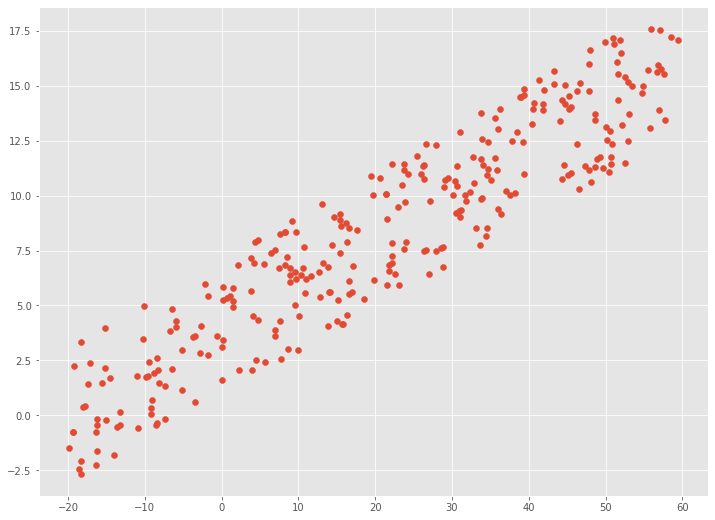

In [2]:
import io
data = pd.read_csv('linear.regression.csv')
X = data.iloc[:, 0]
Y = data.iloc[:, 2]
plt.scatter(X, Y)
plt.show()

In [3]:
# initial guess
m = 5
c = -5

In [4]:
X[0:5]

0    12.699206
1   -16.338590
2    16.566408
3    47.881772
4    15.416405
Name: X, dtype: float64

In [5]:
# 這是一個方便的指令；一個指令完成一個 series 的運算
tempY = m*X + c
tempY[0:5]

0     58.496031
1    -86.692950
2     77.832039
3    234.408862
4     72.082027
Name: X, dtype: float64

In [6]:
Y[0:5]

0     6.539841
1    -0.767718
2     5.513282
3    14.776354
4     7.383281
Name: Y2, dtype: float64

In [7]:
delta = Y - tempY
delta[0:5]

0    -51.956189
1     85.925232
2    -72.318758
3   -219.632507
4    -64.698746
dtype: float64

In [8]:
type(delta)

pandas.core.series.Series

In [9]:
# 一般的 Python list 沒有這樣便利
list1 = [1, 2, 3, 4]
list2 = [2, 4, 6, 8]
# list1 * list2  # 錯誤指令

In [10]:
series1 = pd.Series(list1)
series2 = pd.Series(list2)
type(series1)

pandas.core.series.Series

In [11]:
print("the inner product")
print(series1*series2)
print("the sum")
print(sum(series1*series2))

the inner product
0     2
1     8
2    18
3    32
dtype: int64
the sum
60


In [12]:
# Building the model

L = 0.001  # The learning Rate
epochs = 500  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X

for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (Y - Y_pred))  # 相當於做 X_1 的微分，但是這裡依賴數據的誤差資訊
    D_c = (-2/n) * sum(Y - Y_pred)  # 相當於做 X_0 的微分，但是這裡依賴數據的誤差資訊；X_0=1所以不必乘
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    Y_pred = m*X + c

print (m, c)

0.32686817011449676 -1.413367356677884


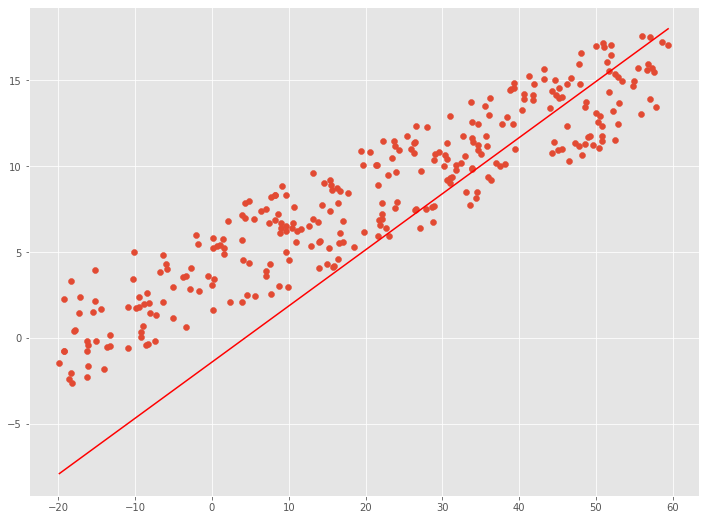

In [13]:
# Making predictions
Y_pred = m*X + c

plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') # predicted
plt.show()

In [14]:
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np


model = linear_model.LinearRegression()
model.fit(X.values.reshape(-1,1),Y.values)
model.coef_, model.intercept_

(array([0.20667775]), 3.9003893570672643)